# 项目：TMDb电影数据分析

## 目录
<ul>
<li><a href="#intro">项目描述</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 项目描述


>电影行业近年在我国鹏蓬勃发展，已成为重要的娱乐消费项目。一部好的电影也是一部好的艺术作品，除能带给观众娱乐以外，还能传达各种信息，给人思考、讨论的机会。电影行业的的发展需要观众口碑（评分）与票房的支持，同时观众口碑（评分）与票房一定程度也反映出行业内导演水平。分析电影数据有助于抓住电影市场的状况。

>数据来源是Udacity提供的源自Kaggle的TMDb数据集，包括了1 万条电影的信息。


In [2]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## 数据整理


### 查看分析数据

In [4]:
# 加载数据
df_movies = pd.read_csv('tmdb-movies.csv')
# 预览数据
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
#查看数据字段及是否有缺失值
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### 理解字段意思
>因对字段不太熟悉，所以需要把字段意思翻译成中文，先理解字段含义。字段含义借助谷歌在线翻译和百度整理,同时也百度了md列表的表示语法。

    1.id: 电影的id
    2.imdb_id: imdb id
    3.popularity: 流行度
    4.budget：预算
    5.revenue：收入
    6.original_title：片名
    7.cast: 演员表
    8.homepage: 电影主页
    9.directior： 导演
    10.tagline: 标语
    11.keywords：关键词
    12.overview: 影片概述
    13.runtime：影片时长
    14.genres：影片风格
    15.production_companies：出品公司
    16.release_date：发行日期
    17.vote_count：得票总数
    18.vote_average：平均分
    19.release_year：发行年
    20.budget_adj：调整预算
    21.revenue_adj：调整收入

In [39]:
#使用describe查看总体数据的统计
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>release_year 发行年从1960开始到2015年，跨度为45年。在影片时长、预算和收入方面，均存在0的情况。

### 提出问题
    1.电影出产的年份和评分有什么关系？
    2.电影出产的年份和票房又有什么关系？
    3.导演对电影的票房、评分的影响？

### 数据清理
>数据清洗主要包括缺失值检查、重复值检查
    
    1.缺失值检查：数据中homepage、runtime、tagline、production_companies等有缺失，但不是重点关心的信息，可以忽略。
     但director存在少量缺失，需要后续作删除相关数据处理。
    2.重复值检查：数据中的id是每部电影的唯一识别码，需要看看有没有重复数据：

In [62]:
# 查看id唯一值数量
len(df_movies.id.unique())

10865

>因没有重复的电影id，可初步判断没有重复电影的数据。

<a id='eda'></a>
## 探索性数据分析


### 电影出产的年份和评分有什么关系？

Text(0,0.5,'vote_average')

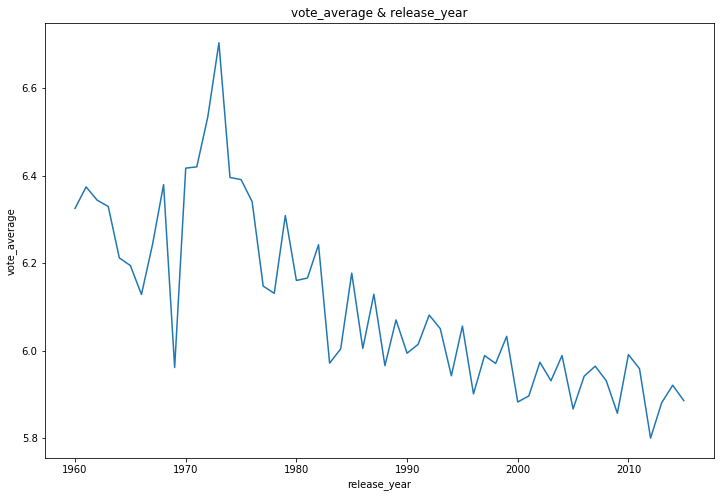

In [63]:
#相关字段为 release_year，vote_average
#创建电影发行年数组
year = df_movies['release_year']
#计算每年电影评分的平均分
vote_year_mean = df_movies.groupby('release_year')['vote_average'].mean()
#创建年份和评分的折线图
vote_year_mean.plot(figsize=(12,8),title='vote_average & release_year')
plt.ylabel('vote_average')

>可以看出近40年来电影评分整体趋势下降，特别在1975年左右严重下滑，近年稍微有所回升。

### 电影出产的年份和票房又有什么关系？

Text(0,0.5,'revenue')

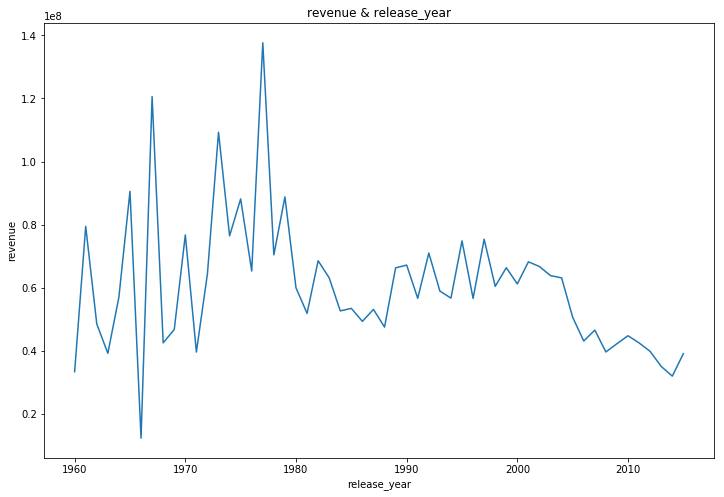

In [64]:
# 创建每年票房revenue_adj平均数据
revenue_mean = df_movies.groupby('release_year')['revenue_adj'].mean()

#创建票房折线图
revenue_mean.plot(figsize=(12,8),title='revenue & release_year')
plt.ylabel('revenue')

>从上图看出，年平均票房总体呈现下降趋势。但客观来说，随着世界经济发展，年平均票房收入趋势下降有点不合理，在此引入统计一下年产电影数量。

In [65]:
#年产电影数量
year_count = df_movies.groupby('release_year')['release_year'].count()

Text(0,0.5,'year_count')

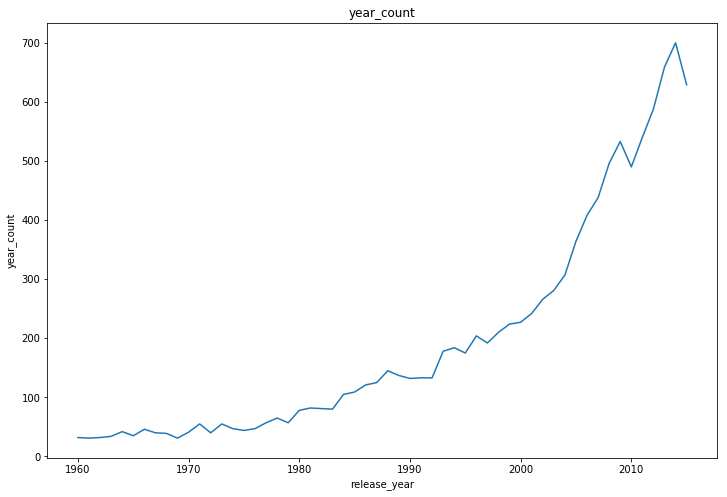

In [66]:
#创建年产电影数量折线图
year_count.plot(figsize=(12,8),title='year_count')
plt.ylabel('year_count')

>从图可见，年产电影的数量按年不断增长。结合前两张图表，评分一直处于下降状态。在此大胆推测，电影数量虽然大幅上升，而电影质量整体下降，导致评分也随之降低。年均票房收入也受到电影数量影响，拉低了数字。

### 导演对电影的票房、评分的影响？

>上两个问题分析了评分、票房和电影数量的关系。这里再看看导演，评分、票房又有什么表现？哪几位导演口碑较好？

In [13]:
#整理导演相关数据。从上面可知，导演字段列中存在缺失值。因导演为单独个体，无法用均值等数据代替，因此作删除处理
df_movies['director'].dropna(inplace=True)
#再次检查删除操作后已不存在缺失值
sum(df_movies['director'].isnull())

0

In [54]:
#查看导演信息
df_movies['director'].value_counts()

Woody Allen                                  45
Clint Eastwood                               34
Martin Scorsese                              29
Steven Spielberg                             29
Ridley Scott                                 23
Steven Soderbergh                            22
Ron Howard                                   22
Joel Schumacher                              21
Brian De Palma                               20
Tim Burton                                   19
Wes Craven                                   19
Barry Levinson                               19
John Carpenter                               18
Mike Nichols                                 18
Rob Reiner                                   18
David Cronenberg                             18
Norman Jewison                               17
Spike Lee                                    17
Robert Zemeckis                              17
Sidney Lumet                                 17
Tyler Perry                             

>筛选结果看出，存在有部分电影有多个导演合作，因此需要进一步对director数据进行分裂处理。

In [64]:
#对director数据进行分裂处理。处理方式是参考了老师的审阅建议，Thanks♪(･ω･)ﾉ 对于split的用法我又回头看了一遍视频和练习。
directors = df_movies['director'].str.split('|',expand = True).stack().reset_index(level = 1,drop = True).rename('director2')
#复查是否都处理完整
directors.value_counts()

Woody Allen             46
Clint Eastwood          34
Martin Scorsese         31
Steven Spielberg        30
Ridley Scott            23
Steven Soderbergh       23
Ron Howard              22
Joel Schumacher         21
Tim Burton              20
Brian De Palma          20
Francis Ford Coppola    19
John Carpenter          19
Robert Rodriguez        19
David Cronenberg        19
Wes Craven              19
Barry Levinson          19
Rob Reiner              18
Walter Hill             18
John Landis             18
Mike Nichols            18
Renny Harlin            17
Oliver Stone            17
Roman Polanski          17
Joel Coen               17
Tyler Perry             17
Stephen Frears          17
Sidney Lumet            17
Norman Jewison          17
Peter Hyams             17
Spike Lee               17
                        ..
Mark Aldo Miceli         1
Max Winkler              1
Dan Riba                 1
Wolf Rilla               1
Destin Cretton           1
Stephen Cooter           1
D

In [67]:
#对新列进行合并操作.处理方式是参考了老师的审阅建议
new_df_movies = df_movies.join(directors)
new_df_movies[['director','director2','id']].head(20)

,director,director2,id
0,Colin Trevorrow,Colin Trevorrow,135397
1,George Miller,George Miller,76341
2,Robert Schwentke,Robert Schwentke,262500
3,J.J. Abrams,J.J. Abrams,140607
4,James Wan,James Wan,168259
5,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,281957
6,Alan Taylor,Alan Taylor,87101
7,Ridley Scott,Ridley Scott,286217
8,Kyle Balda|Pierre Coffin,Kyle Balda,211672
8,Kyle Balda|Pierre Coffin,Pierre Coffin,211672


Text(0,0.5,'vote freq')

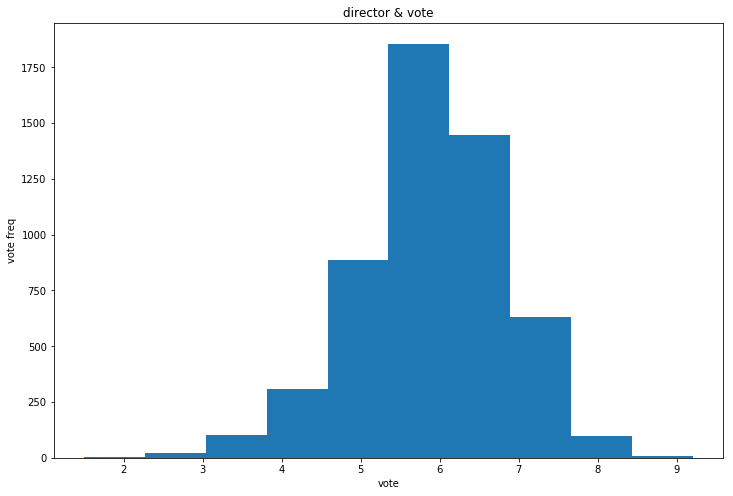

In [74]:
#全体导演的平均评分
director_vote = new_df_movies.groupby('director2')['vote_average'].mean()
director_vote.plot(kind='hist',figsize=(12,8),title='director & vote')
plt.xlabel('vote')
plt.ylabel('vote freq')

>普遍导演评分都集中在5.5 - 7之间。

Text(0,0.5,'revenue freq')

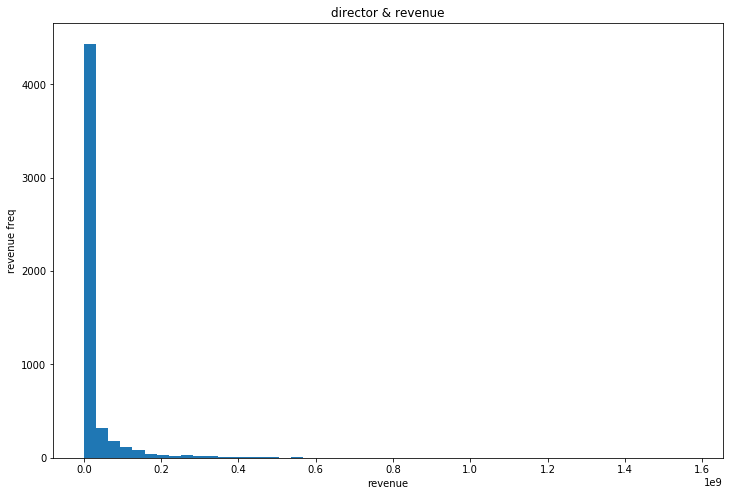

In [79]:
#导演个人的平均票房
director_revenue = new_df_movies.groupby('director2')['revenue_adj'].mean()
director_revenue.plot(kind='hist',figsize=(12,8),title='director & revenue',bins=50)
plt.xlabel('revenue')
plt.ylabel('revenue freq')

>票房集中于某些导演身上。不妨分别看看票房收入最高、评分最高的5位导演是谁。

In [82]:
#找出票房收入最高的5位导演
top5_directors =  director_revenue.sort_values().tail(5)
top5_directors

director2
Pierre Coffin     8.387905e+08
Lee Unkrich       8.540177e+08
George Lucas      1.052320e+09
Clyde Geronimi    1.574815e+09
Hamilton Luske    1.574815e+09
Name: revenue_adj, dtype: float64

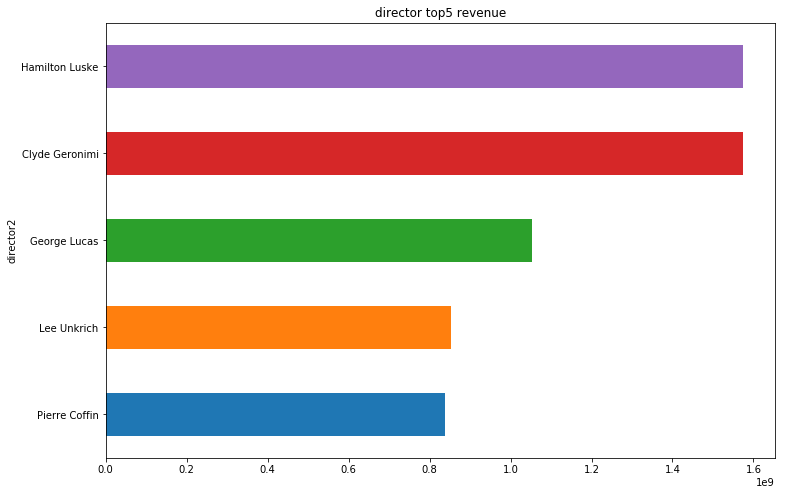

In [83]:
# top5_directors
top5_directors.plot(kind='barh',figsize=(12,8),title='director top5 revenue')

In [87]:
#找出平均评分最高的5位导演
top5_vote_directors =  director_vote.sort_values().tail(5)
top5_vote_directors

director2
Saul Swimmer        8.5
James Payne         8.5
David Mallet        8.7
Derek Frankowski    8.8
Mark Cousins        9.2
Name: vote_average, dtype: float64

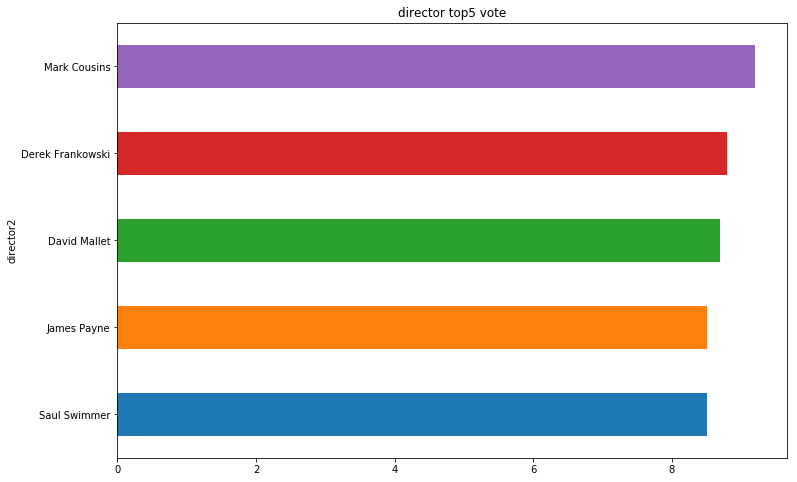

In [85]:
# top5_vote_directors
top5_vote_directors.plot(kind='barh',figsize=(12,8),title='director top5 vote')

>从上两图得出结果，票房收入最高的5位导演与评分最高的5位导演，完全没有重合。大胆推测，导演的口碑好坏并不一定是票房保证。

<a id='conclusions'></a>
## 结论
结合以上分析，总结得出以下几点：
    
    1.电影数量虽然大幅上升，而电影质量整体下降，导致评分也随之降低。年均票房收入也受到电影数量影响，拉低了数字。
    2.票房集中于某些导演身上。
    3.导演的口碑好坏并不一定是票房保证。
此次分析程度较浅，仅从评分、票房、导演角度出发看问题。且数据集是从世界电影角度收集，分析整体局面，分析出来的结论也许对局部国家地区不适用。
此次遇到比较大困难是图表的创建和类型选择，其次是对pandas的方法运用未够灵活，希望后续继续学习，加强练习，对matplotlib、pandas运用更上手。

In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295